# Understanding the Dirichlet Process: Theory, Mathematics, and Applications

The Dirichlet Process (DP) is a cornerstone of Bayesian nonparametric statistics, offering a flexible framework for modeling data with an infinite number of components. Unlike parametric models that assume a fixed number of parameters, the DP allows for an unbounded number of clusters, making it ideal for scenarios where the number of underlying groups or patterns is unknown. Introduced by Thomas Ferguson in 1973, the DP has become a fundamental tool in machine learning, particularly in clustering, density estimation, and mixture modeling. This blog explores the theory behind the Dirichlet Process, its mathematical underpinnings, and its practical applications, complete with code examples to illustrate its implementation.

At its core, the Dirichlet Process is a probability distribution over probability distributions. It is a stochastic process that generates random measures, which can be thought of as distributions over a space of possible outcomes. The DP is particularly appealing in Bayesian nonparametrics because it allows models to grow in complexity as more data is observed, without requiring the number of components to be specified in advance. This adaptability makes it suitable for applications like topic modeling, where the number of topics in a corpus of documents is unknown, or in bioinformatics, where the number of distinct genetic profiles may vary.

The Dirichlet Process is parameterized by two components: a base distribution and a concentration parameter. The base distribution, often denoted as $ H $, represents the expected distribution of the random measure, essentially acting as a prior over the parameters of the distribution. The concentration parameter, denoted as $ \alpha $, controls the variability of the random measure around the base distribution. A larger $ \alpha $ leads to random measures that are more similar to the base distribution, while a smaller $ \alpha $ results in measures that are more concentrated on a few distinct values. This interplay between $ H $ and $ \alpha $ gives the DP its flexibility, allowing it to model complex, multimodal data.

A Dirichlet Process is denoted:

$$G \sim \text{DP}(\alpha, G_0)$$

This means “G is a random probability distribution sampled from (~) a Dirichlet Process with concentration parameter $\alpha$ and base distribution $H$.”

To understand the DP mathematically, consider a measurable space $ \Theta $. The Dirichlet Process is a random probability measure $ G $ on $ \Theta $ such that, for any finite partition $ \{A_1, A_2, \dots, A_k\} $ of $ \Theta $, the vector of probabilities $ (G(A_1), G(A_2), \dots, G(A_k)) $ follows a Dirichlet distribution with parameters $ (\alpha H(A_1), \alpha H(A_2), \dots, \alpha H(A_k)) $. This property ensures that the random measure $ G $ is consistent across different partitions, a key feature that makes the DP a coherent stochastic process. The Dirichlet distribution, which the DP builds upon, is a multivariate generalization of the beta distribution, commonly used in Bayesian statistics to model probabilities over categorical outcomes.

One of the most intuitive ways to conceptualize the Dirichlet Process is through its stick-breaking representation, introduced by Sethuraman in 1994. Imagine a stick of unit length that you break into infinitely many pieces, where each piece represents the weight of a distinct atom in the random measure. The stick-breaking process begins by sampling a sequence of independent beta random variables $ V_i \sim \text{Beta}(1, \alpha) $. The weight of the $ i $-th atom is computed as $ \pi_i = V_i \prod_{j=1}^{i-1} (1 - V_j) $, and the location of the atom, $ \theta_i $, is drawn independently from the base distribution $ H $. The random measure is then $ G = \sum_{i=1}^\infty \pi_i \delta_{\theta_i} $, where $ \delta_{\theta_i} $ is a point mass at $ \theta_i $. This construction highlights the discrete nature of the DP, as the resulting measure is almost surely discrete, with probability mass concentrated on a countably infinite set of points.

The stick-breaking representation is not just a theoretical construct; it is also computationally useful. It allows us to approximate the infinite sum by truncating it at a finite number of components, which is practical for implementation in algorithms. For example, in a clustering application, each $ \theta_i $ could represent the parameters of a cluster, and the weights $ \pi_i $ determine the probability of a data point belonging to that cluster. As more data is observed, the DP can generate new clusters by assigning non-zero weights to new atoms, effectively allowing the model to adapt to the data's complexity.

Let's take Gaussian (Normal) distribution as an example.  The parameters of a cluster are:
  - **Mean** ($\mu$): the center of the cluster
  - **Variance** ($\sigma^2$) or **precision** ($\tau = 1/\sigma^2$): how spread out the cluster is.

- In the context of mixture models, **$\theta_i$** is a generic symbol for the parameters of the $i$-th cluster.
- For a Gaussian mixture, $\theta_i = (\mu_i, \sigma_i^2)$ or $\theta_i = (\mu_i, \tau_i)$.
- For other distributions, $\theta_i$ would be the parameters of that distribution (e.g., for a Poisson, it would be the rate $\lambda$; for a categorical, it would be the probabilities for each category).


In the Dirichlet Process Mixture Model, there are an infinite (or very large) number of possible clusters.  Each cluster $i$ has its own parameters $\theta_i$.  When you assign a data point to a cluster, you are saying: “This data point was generated from the distribution with parameters $\theta_i$.”


### Example (Gaussian Mixture)

Suppose you have 3 clusters:
- Cluster 1: $\theta_1 = (\mu_1 = -5, \sigma_1^2 = 1)$
- Cluster 2: $\theta_2 = (\mu_2 = 0, \sigma_2^2 = 1)$
- Cluster 3: $\theta_3 = (\mu_3 = 5, \sigma_3^2 = 1)$

If a data point is assigned to cluster 2, it is assumed to be drawn from a normal distribution with mean 0 and variance 1.

---

### Summary Table

| Cluster | $\theta_i$ (parameters) | What it means                |
|---------|--------------------------|------------------------------|
| 1       | ($\mu_1$, $\sigma_1^2$) | Mean and variance of cluster 1 |
| 2       | ($\mu_2$, $\sigma_2^2$) | Mean and variance of cluster 2 |
| ...     | ...                      | ...                          |

---

**In short:**  
> Each $\theta_i$ is the set of parameters that define the probability distribution for cluster $i$. For a Gaussian, these are the mean and variance (or precision).




Another key representation of the Dirichlet Process is the Chinese Restaurant Process (CRP), which provides a generative perspective on how data points are assigned to clusters. Imagine a restaurant with an infinite number of tables, each associated with a dish (parameter) drawn from $ H $. The first customer sits at the first table and is served a dish drawn from $ H $. Subsequent customers either join an existing table with a probability proportional to the number of customers already seated there or start a new table with a probability proportional to $ \alpha $. Specifically, the $ n $-th customer joins table $ k $ with probability $ \frac{n_k}{\alpha + n - 1} $, where $ n_k $ is the number of customers at table $ k $, or starts a new table with probability $ \frac{\alpha}{\alpha + n - 1} $. This process naturally leads to a clustering structure where popular tables (clusters) grow larger, but new tables can always emerge, reflecting the nonparametric nature of the DP.

The CRP is particularly insightful because it illustrates the exchangeability property of the DP. Exchangeability means that the joint distribution of the data is invariant to the order in which the observations are made. This property is crucial in Bayesian modeling, as it ensures that the model’s predictions do not depend on the arbitrary ordering of the data. The CRP also connects directly to the stick-breaking representation, as the weights of the tables correspond to the stick-breaking weights $ \pi_i $, and the dishes served at each table correspond to the atoms $ \theta_i $.

To formalize the mathematical properties of the Dirichlet Process, consider its expectation and variance. The expected value of the random measure $ G $ is the base distribution $ H $, i.e., $ E[G(A)] = H(A) $ for any measurable set $ A $. The variance of $ G(A) $ is given by $ \text{Var}(G(A)) = \frac{H(A)(1 - H(A))}{\alpha + 1} $, indicating that the concentration parameter $ \alpha $ controls the variability of the random measure. A small $ \alpha $ results in a highly variable measure, concentrating mass on a few atoms, while a large $ \alpha $ makes $ G $ more similar to $ H $. These properties make the DP a powerful prior for Bayesian inference, as it balances prior knowledge (via $ H $) with flexibility (via $ \alpha $).

The Dirichlet Process is most commonly used in mixture models, known as Dirichlet Process Mixture Models (DPMMs). In a DPMM, each data point is assumed to be generated from a mixture of distributions, where the mixing proportions and component parameters are drawn from a DP. For example, in a Gaussian mixture model, each component might be a Gaussian distribution with parameters $ \theta_i = (\mu_i, \Sigma_i) $, where $ \mu_i $ is the mean and $ \Sigma_i $ is the covariance matrix. The DP prior allows the number of components to be infinite, but in practice, only a finite number of components are needed to model the observed data, as the weights $ \pi_i $ decay rapidly for large $ i $.

To implement a DPMM, one often uses Markov Chain Monte Carlo (MCMC) methods, such as Gibbs sampling, or variational inference to approximate the posterior distribution. Gibbs sampling, for instance, iteratively updates the cluster assignments for each data point based on the CRP probabilities and updates the cluster parameters based on the likelihood of the data. Variational inference, on the other hand, approximates the posterior by optimizing a simpler distribution to be close to the true posterior, often using a truncated stick-breaking approximation.

Let’s explore a practical implementation of a Dirichlet Process Mixture Model using Python. We’ll use the `numpy` and `scipy` libraries to simulate data and implement a simple Gibbs sampler for a Gaussian DPMM. The goal is to cluster 1D data points drawn from a mixture of Gaussians, where the number of components is unknown.



In [2]:
import numpy as np
from scipy.stats import norm, gamma

# Generate synthetic data: mixture of 3 Gaussians
np.random.seed(42)
n = 200
true_means = [-5, 0, 5]
true_weights = [0.4, 0.3, 0.3]
data = np.concatenate([
    np.random.normal(true_means[i], 1, int(n * true_weights[i]))
    for i in range(3)
])

# Parameters
alpha = 1.0  # Concentration parameter
K = 20       # Truncation level for approximation
n_iter = 100 # Number of Gibbs iterations

# Initialize
z = np.random.randint(0, K, n)  # Cluster assignments
means = np.random.normal(0, 10, K)  # Cluster means
precisions = gamma.rvs(1, scale=1, size=K)  # Cluster precisions
counts = np.bincount(z, minlength=K)  # Number of points per cluster

# Gibbs sampling
for _ in range(n_iter):
    # Update cluster assignments
    for i in range(n):
        # Remove point from current cluster
        old_k = z[i]
        counts[old_k] -= 1
        if counts[old_k] == 0:
            means[old_k] = np.random.normal(0, 10)
            precisions[old_k] = gamma.rvs(1, scale=1)
        
        # Compute probabilities for each cluster
        probs = np.zeros(K + 1)
        for k in range(K):
            probs[k] = counts[k] * norm.pdf(data[i], means[k], 1/np.sqrt(precisions[k]))
        probs[K] = alpha * norm.pdf(data[i], 0, 10)  # New cluster
        probs /= probs.sum()
        
        # Sample new cluster
        new_k = np.random.choice(K + 1, p=probs)
        if new_k == K:
            new_k = np.where(counts == 0)[0][0]  # Use an empty cluster
            means[new_k] = np.random.normal(data[i], 1)
            precisions[new_k] = gamma.rvs(1, scale=1)
        z[i] = new_k
        counts[new_k] += 1
    
    # Update cluster parameters
    for k in range(K):
        if counts[k] > 0:
            points = data[z == k]
            n_k = len(points)
            precisions[k] = gamma.rvs(1 + n_k/2, scale=1/(1 + 0.5 * np.sum((points - np.mean(points))**2)))
            means[k] = np.random.normal(np.mean(points), 1/np.sqrt(n_k * precisions[k]))

# Print results
unique_clusters = np.unique(z)
print(f"Estimated number of clusters: {len(unique_clusters)}")
for k in unique_clusters:
    print(f"Cluster {k}: mean={means[k]:.2f}, precision={precisions[k]:.2f}, count={counts[k]}")

Estimated number of clusters: 3
Cluster 3: mean=0.20, precision=1.06, count=59
Cluster 6: mean=4.99, precision=1.10, count=61
Cluster 19: mean=-5.01, precision=1.13, count=80


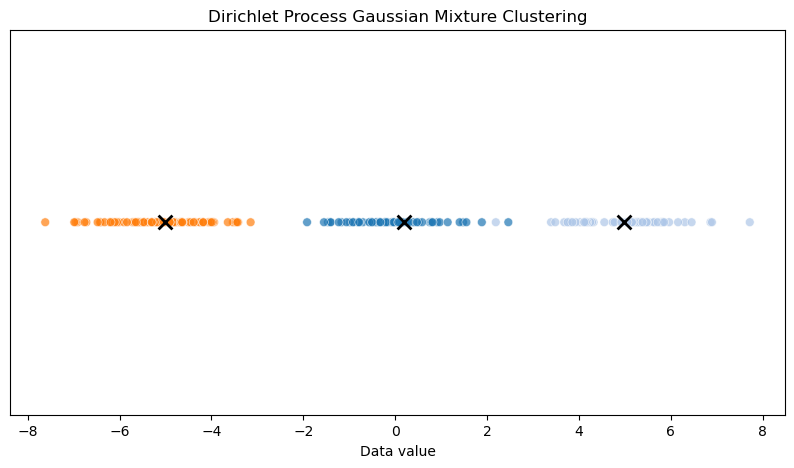

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clustering results
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data, y=[0]*len(data), hue=z, palette='tab20', legend=False, s=40, alpha=0.7)
# Plot cluster means
for k in np.unique(z):
    plt.scatter(means[k], 0, color='black', marker='x', s=100, linewidths=2)
plt.title('Dirichlet Process Gaussian Mixture Clustering')
plt.xlabel('Data value')
plt.yticks([])
plt.show()

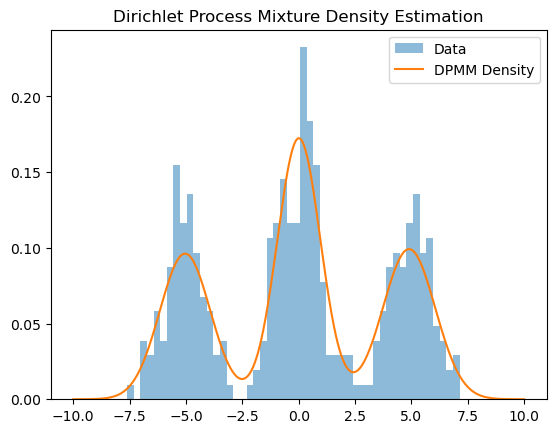

In [1]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-5, 1, 100),
    np.random.normal(0, 1, 150),
    np.random.normal(5, 1, 100)
]).reshape(-1, 1)

# Fit DPMM
dpmm = BayesianGaussianMixture(
    n_components=10,  # Upper bound on components
    weight_concentration_prior=1.0,  # Alpha
    max_iter=100,
    random_state=42
).fit(data)

# Predict densities
x = np.linspace(-10, 10, 1000).reshape(-1, 1)
log_dens = dpmm.score_samples(x)
density = np.exp(log_dens)

# Plot
plt.hist(data, bins=50, density=True, alpha=0.5, label='Data')
plt.plot(x, density, label='DPMM Density')
plt.legend()
plt.title('Dirichlet Process Mixture Density Estimation')
plt.show()